In [1]:
import ScraperFC as sfc
import traceback
from data_viz_helpers import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
scraper = sfc.WhoScored()
try:
    match_data = scraper.scrape_match(
        'https://www.whoscored.com/Matches/1602930/Live/International-World-Cup-Qualification-UEFA-2021-2022-Portugal-Turkey'
    )
except:
    traceback.print_exc()
scraper.close()

So we've scraped the Opta match data, now we need to find Harry Kane's player ID to identify his events.

In [3]:
match_data['matchCentreData']['playerIdNameDictionary']

{'5583': 'Cristiano Ronaldo',
 '16161': 'João Moutinho',
 '19859': 'José Fonte',
 '23089': 'Rui Patrício',
 '69945': 'Cédric Soares',
 '94891': 'Danilo Pereira',
 '99911': 'William Carvalho',
 '115375': 'Raphaël Guerreiro',
 '120608': 'Otávio',
 '122714': 'José Sá',
 '123761': 'Bruno Fernandes',
 '136741': 'Bernardo Silva',
 '235755': 'Diogo Jota',
 '247995': 'Gonçalo Guedes',
 '299460': 'André Silva',
 '349207': 'Rafael Leão',
 '353418': 'Diogo Dalot',
 '362431': 'João Félix',
 '367181': 'Tiago Djaló',
 '373842': 'Diogo Costa',
 '384887': 'Vitinha',
 '395221': 'Nuno Mendes',
 '394933': 'Matheus Nunes',
 '23282': 'Burak Yilmaz',
 '24992': 'Sinan Bolat',
 '32010': 'Caner Erkin',
 '67625': 'Serdar Aziz',
 '110373': 'Hakan Calhanoglu',
 '113772': 'Serdar Dursun',
 '129171': 'Kaan Ayhan',
 '130561': 'Taylan Antalyali',
 '134695': 'Enes Ünal',
 '136481': 'Mehmet Zeki Çelik',
 '255071': 'Cengiz Ünder',
 '258840': 'Ugurcan Çakir',
 '280754': 'Dorukhan Toköz',
 '303158': 'Yusuf Yazici',
 '3179

We see that Harry Kane's Opta player ID is 83532. Now we need to find all of his events and get their x-y locations.

In [4]:
player_id = 16161
event_locations = list()

for event in match_data['matchCentreData']['events']:
    if 'playerId' not in event.keys():
        continue
    elif event['playerId'] == player_id:
        event_locations.append([event['x'], event['y']])

event_locations = np.array(event_locations)
event_locations.shape

(127, 2)

Now we can plot these events on the pitch and generate a heatmap of them.

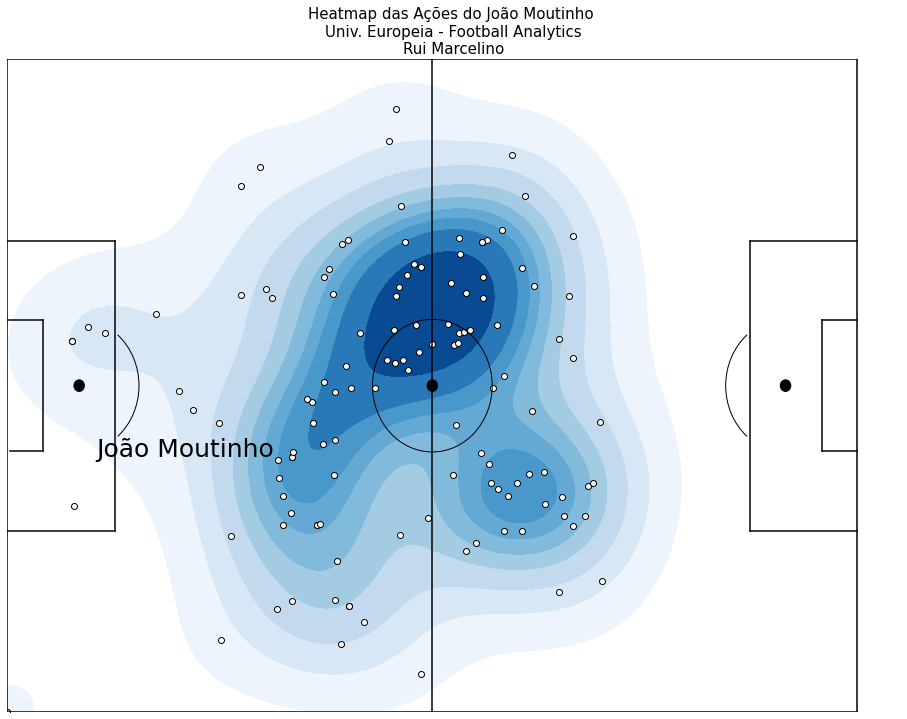

In [7]:
fig, ax = plt.subplots(figsize=[16,12])

# Plot the field
ax = plot_field(ax)

# Scale the Opta data to the range [0,130] and [0,90]
# for x and y respectively
x = event_locations[:,0] / 100 * 130
y = event_locations[:,1] / 100 * 90

# plot the heatmap
ax = sns.kdeplot(x=x, y=y, clip=[[0,130], [0,90]], shade=True, cmap='Blues')

# plot the events
ax.scatter(x, y, color='white', edgecolor='black')
ax.set_title("Heatmap das Ações do João Moutinho \nUniv. Europeia - Football Analytics\nRui Marcelino", fontsize=15)
ax.annotate('João Moutinho', xy=(x[0], y[0]), xytext=(x[0]-30, y[0]), color='black', fontsize=25)
plt.show()
#save figure
fig.savefig('heatmap_JoãoMoutinho.png', dpi=600)

Now let's do the same for Son Heung-Min, whose player ID is 91909

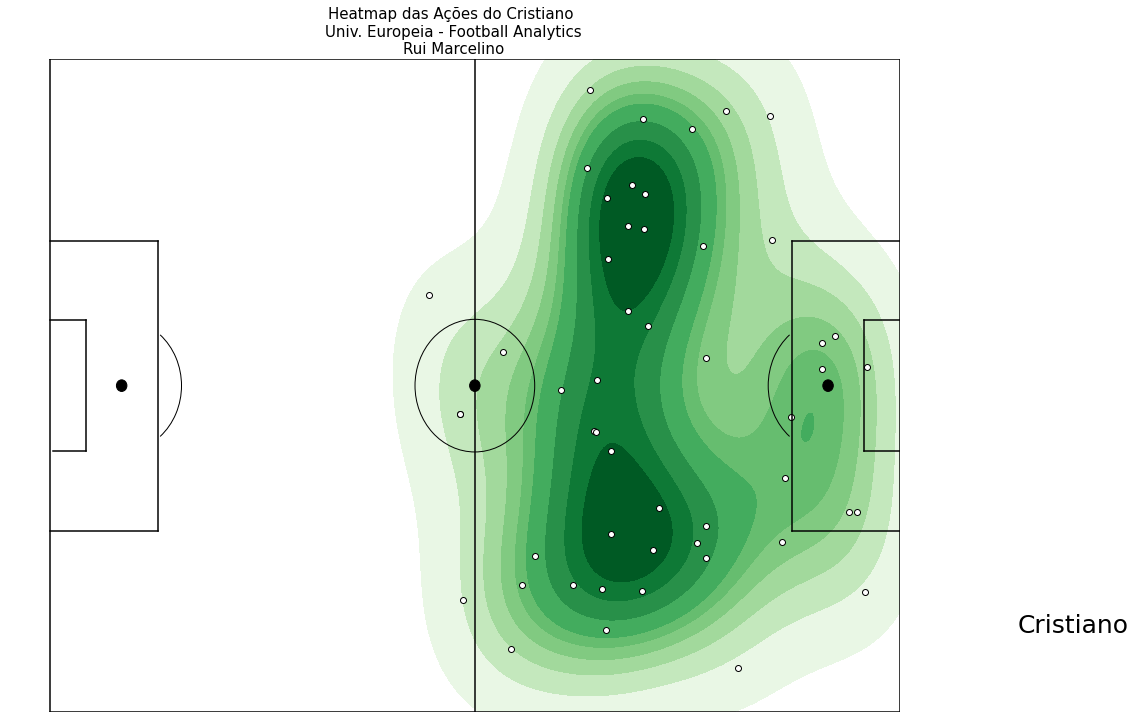

In [8]:
player_id = 5583
event_locations = list()

# gather the player's events
for event in match_data['matchCentreData']['events']:
    if 'playerId' not in event.keys():
        continue
    elif event['playerId'] == player_id:
        event_locations.append([event['x'], event['y']])

event_locations = np.array(event_locations)

# Make the plot
fig, ax = plt.subplots(figsize=[16,12])

# Plot the field
ax = plot_field(ax)

# Scale the Opta data to the range [0,130] 
# and [0,90] for x and y respectively
x = event_locations[:,0] / 100 * 130
y = event_locations[:,1] / 100 * 90

# plot the heatmap
ax = sns.kdeplot(x=x, y=y, clip=[[0,130], [0,90]], shade=True, cmap='Greens')
ax.set_title("Heatmap das Ações do Cristiano \nUniv. Europeia - Football Analytics\nRui Marcelino", fontsize=15)

# plot the events
ax.scatter(x, y, color='white', edgecolor='black')
ax.annotate('Cristiano', xy=(x[0], y[0]), xytext=(x[0]+30, y[0]-40), color='black', fontsize=25)
plt.show()
fig.savefig('heatmap_Cristiano.png', dpi=600)